[*********************100%***********************]  1 of 1 completed


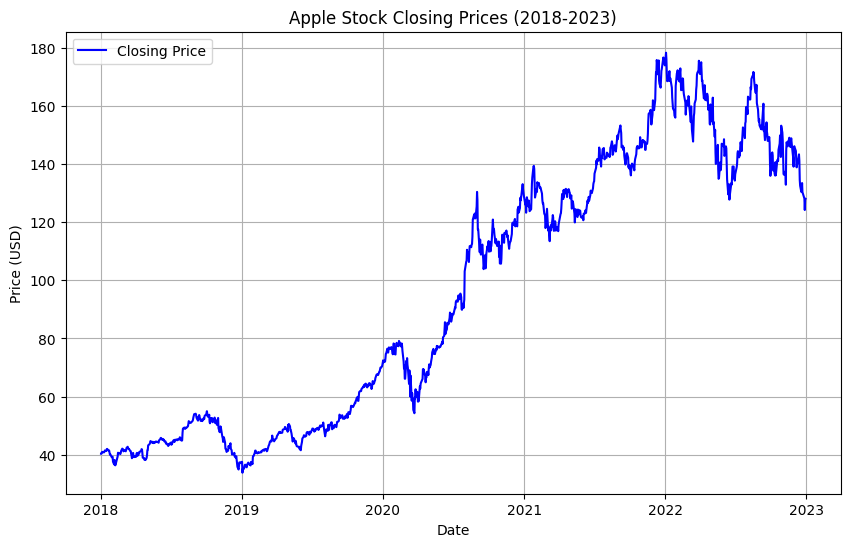

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Apple Inc. stock data from 2018-2023
stock_data = yf.download("AAPL", start="2018-01-01", end="2023-01-01", interval="1d")

# Display Close prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price', color='blue')
plt.title("Apple Stock Closing Prices (2018-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


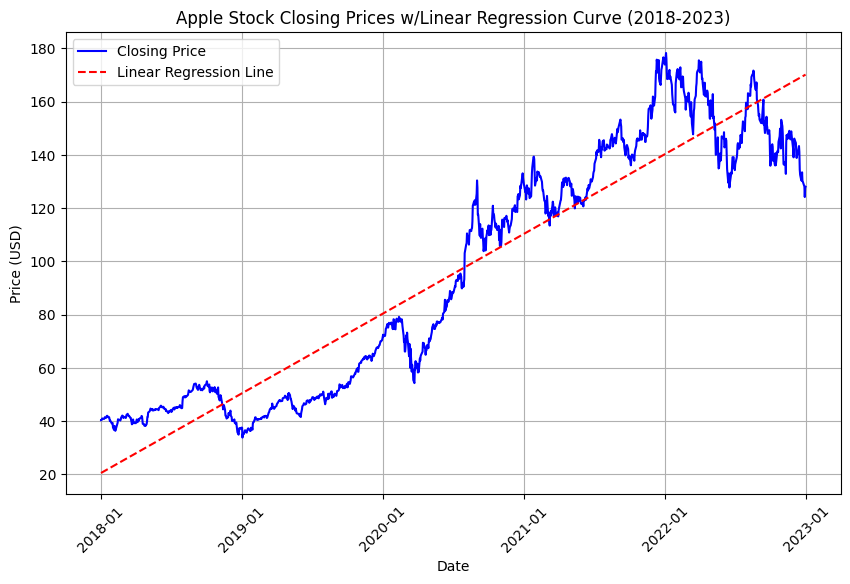

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Download Apple Inc. stock data from 2018-2023
stock_data = yf.download("AAPL", start="2018-01-01", end="2023-01-01", interval="1d")

# Display Close prices
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(stock_data['Close'], label='Closing Price', color='blue')
ax.set_title("Apple Stock Closing Prices w/Linear Regression Curve (2018-2023)")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")

# Display linear regression
dates_numeric = mdates.date2num(stock_data.index)
prices = stock_data['Close'].values

m, b = np.polyfit(dates_numeric, prices, 1)

regression_line_y = m * dates_numeric + b
ax.plot(stock_data.index, regression_line_y, color='red', linestyle='--', label='Linear Regression Line')

ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


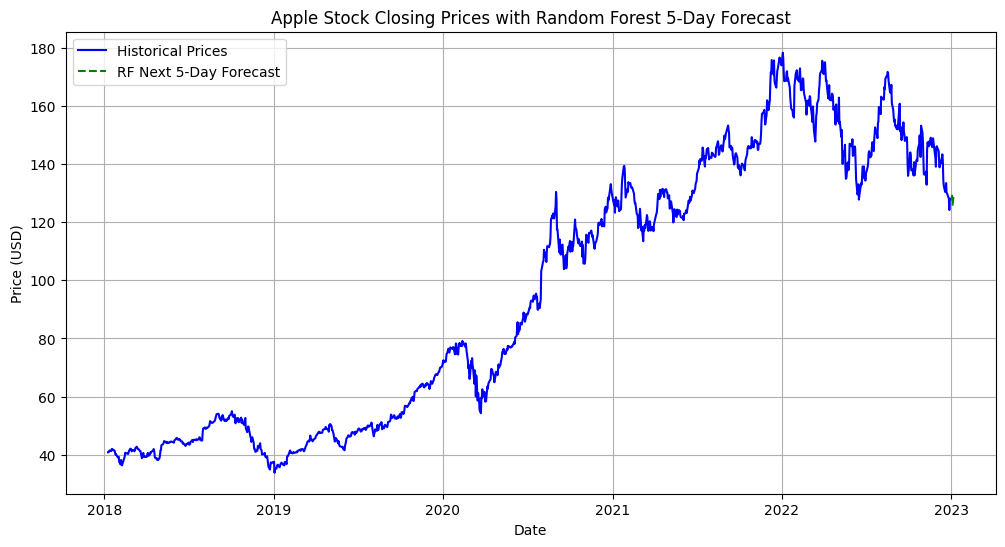

2023-01-02: $128.39
2023-01-03: $129.06
2023-01-04: $125.94
2023-01-05: $127.45
2023-01-06: $128.89


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from pandas.tseries.offsets import BDay

# Download Apple Inc. stock data from 2018-2023
stock_data = yf.download("AAPL", start="2018-01-01", end="2023-01-01", interval="1d")
df = stock_data[['Close']].copy()

# Create lagged features (past 5 days)
lags = 5
for i in range(1, lags + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Features and target
X = df[[f'lag_{i}' for i in range(1, lags + 1)]].values
y = df['Close'].values.ravel()  # Flatten to 1D

# Train Random Forest on all data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict next 5 business days
forecast_days = 5
last_lags = df['Close'].iloc[-lags:].to_numpy().flatten().tolist()
future_predictions = []

for _ in range(forecast_days):
    X_future = np.array(last_lags[-lags:]).reshape(1, -1)
    next_pred = rf_model.predict(X_future)[0]
    future_predictions.append(next_pred)
    last_lags.append(next_pred)

# Create future dates
last_date = df.index[-1]
future_dates = pd.bdate_range(start=last_date + BDay(1), periods=forecast_days)

# Plot historical + next few day forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='RF Next 5-Day Forecast', color='green', linestyle='--')
plt.title("Apple Stock Closing Prices with Random Forest 5-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.legend()
plt.grid()
plt.show()

# Print forecasted prices
for date, price in zip(future_dates, future_predictions):
    print(f"{date.date()}: ${price:.2f}")


[*********************100%***********************]  1 of 1 completed


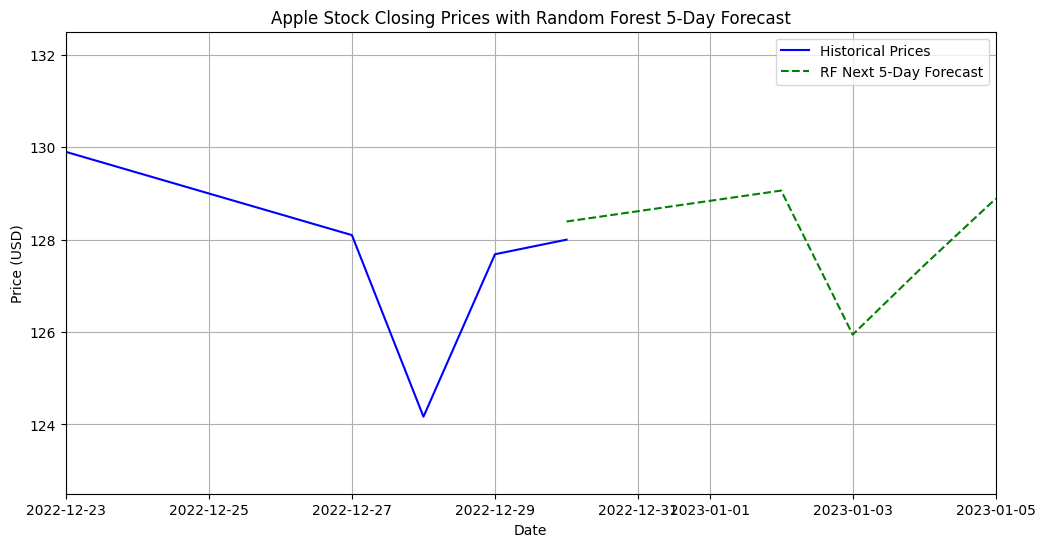

2022-12-30: $128.39
2023-01-02: $129.06
2023-01-03: $125.94
2023-01-04: $127.45
2023-01-05: $128.89


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from pandas.tseries.offsets import BDay

# Download Apple Inc. stock data from 2018-2023
stock_data = yf.download("AAPL", start="2018-01-01", end="2023-01-01", interval="1d")
df = stock_data[['Close']].copy()

# Create lagged features (past 5 days)
lags = 5
for i in range(1, lags + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Features and target
X = df[[f'lag_{i}' for i in range(1, lags + 1)]].values
y = df['Close'].values.ravel()  # Flatten to 1D

# Train Random Forest on all data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict next 5 business days
forecast_days = 5
last_lags = df['Close'].iloc[-lags:].to_numpy().flatten().tolist()
future_predictions = []

for _ in range(forecast_days):
    X_future = np.array(last_lags[-lags:]).reshape(1, -1)
    next_pred = rf_model.predict(X_future)[0]
    future_predictions.append(next_pred)
    last_lags.append(next_pred)

# Create future dates
last_date = df.index[-2]
future_dates = pd.bdate_range(start=last_date + BDay(1), periods=forecast_days)

# Combine historical + forecast for plotting
all_dates = df.index.append(future_dates)
all_prices = np.concatenate([df['Close'].values.flatten(), np.array(future_predictions)])

# Plot historical + next few day forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='RF Next 5-Day Forecast', color='green', linestyle='--')
plt.title("Apple Stock Closing Prices with Random Forest 5-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

# Zoom in: last 30 trading days + forecast
zoom_start = df.index[-5]
zoom_end = future_dates[-1]
plt.xlim(zoom_start, zoom_end)
plt.ylim(122.5,132.5)

plt.legend()
plt.grid()
plt.show()

# Print forecasted prices
for date, price in zip(future_dates, future_predictions):
    print(f"{date.date()}: ${price:.2f}")
